In [1]:
import yfinance as yf
import pandas as pd
import zipfile
import json
from lxml import etree
from io import StringIO
from datetime import date
from tqdm.notebook import tqdm
import requests
from matplotlib import pyplot as plt
import seaborn as sns
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import os
import pickle

In [2]:
# load sentiment analysis data
data_dir = 'dataset/'
path = data_dir + 'combined_2012-01-01_2022-12-31.csv'
df_sentiment = pd.read_csv(path)
df_sentiment = df_sentiment.rename(columns={"ticker": "Company", "end": "Date"})
df_sentiment['Date'] = df_sentiment['Date'].str[:7] # keep only year and month
df_sentiment['Date'] = pd.to_datetime(df_sentiment['Date']) + pd.offsets.MonthEnd(1) # set date to end of month
le = LabelEncoder()
# df_sentiment['Company'] = le.fit_transform(df_sentiment['Company'])
# df_sentiment['industry'] = le.fit_transform(df_sentiment['industry'])
display(df_sentiment.head(5))

,Company,start,Date,sentiment_company,industry,sentiment_industry,sentiment,company_name
0,ABNB,2012-01-01,2012-01-31,0.0,travel-services,-0.047717,-0.047717,"Airbnb, Inc."
1,ABNB,2012-02-01,2012-02-29,0.0,travel-services,-0.200013,-0.200013,"Airbnb, Inc."
2,ABNB,2012-03-01,2012-03-31,0.0,travel-services,-0.199878,-0.199878,"Airbnb, Inc."
3,ABNB,2012-04-01,2012-04-30,0.0,travel-services,0.000245,0.000245,"Airbnb, Inc."
4,ABNB,2012-05-01,2012-05-31,0.0,travel-services,0.250073,0.250073,"Airbnb, Inc."


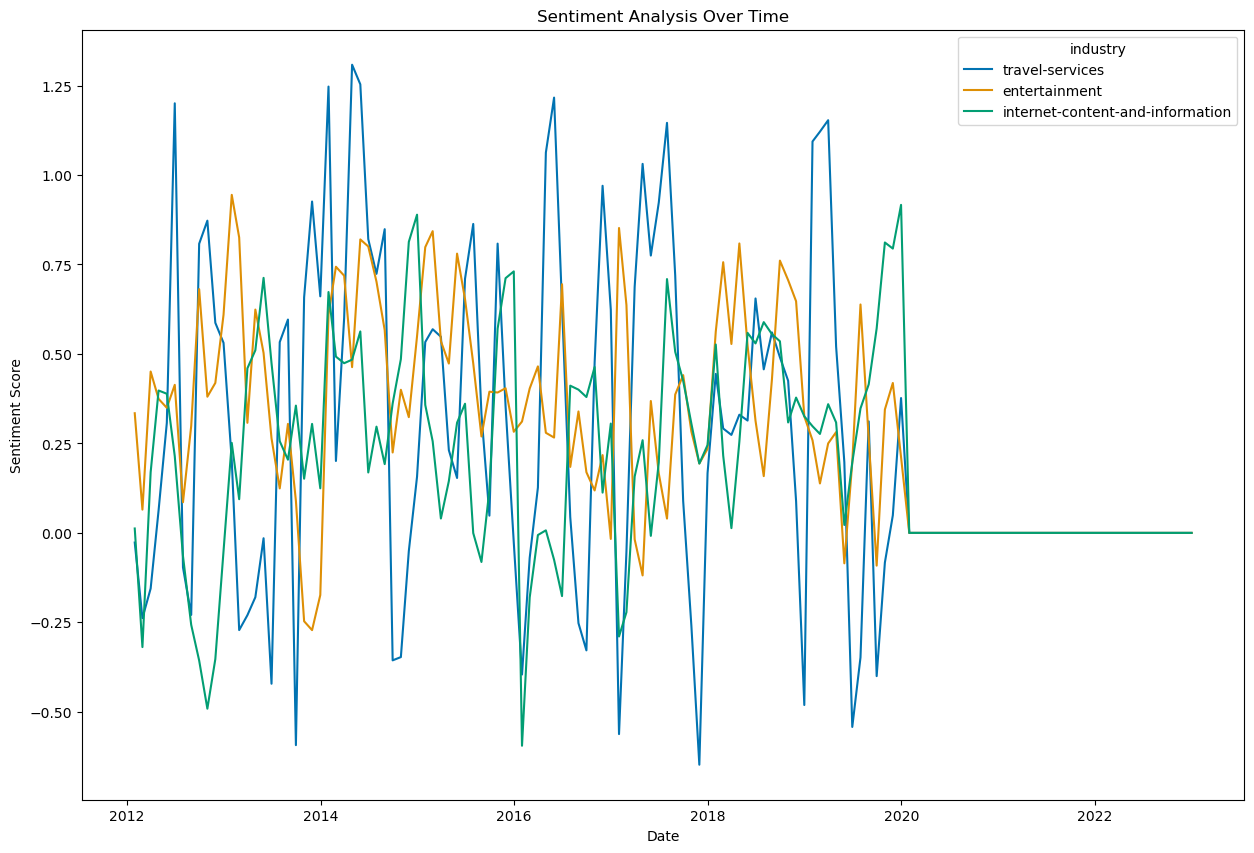

In [3]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_sentiment, x='Date', y='sentiment', hue='industry', errorbar=None, palette='colorblind')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

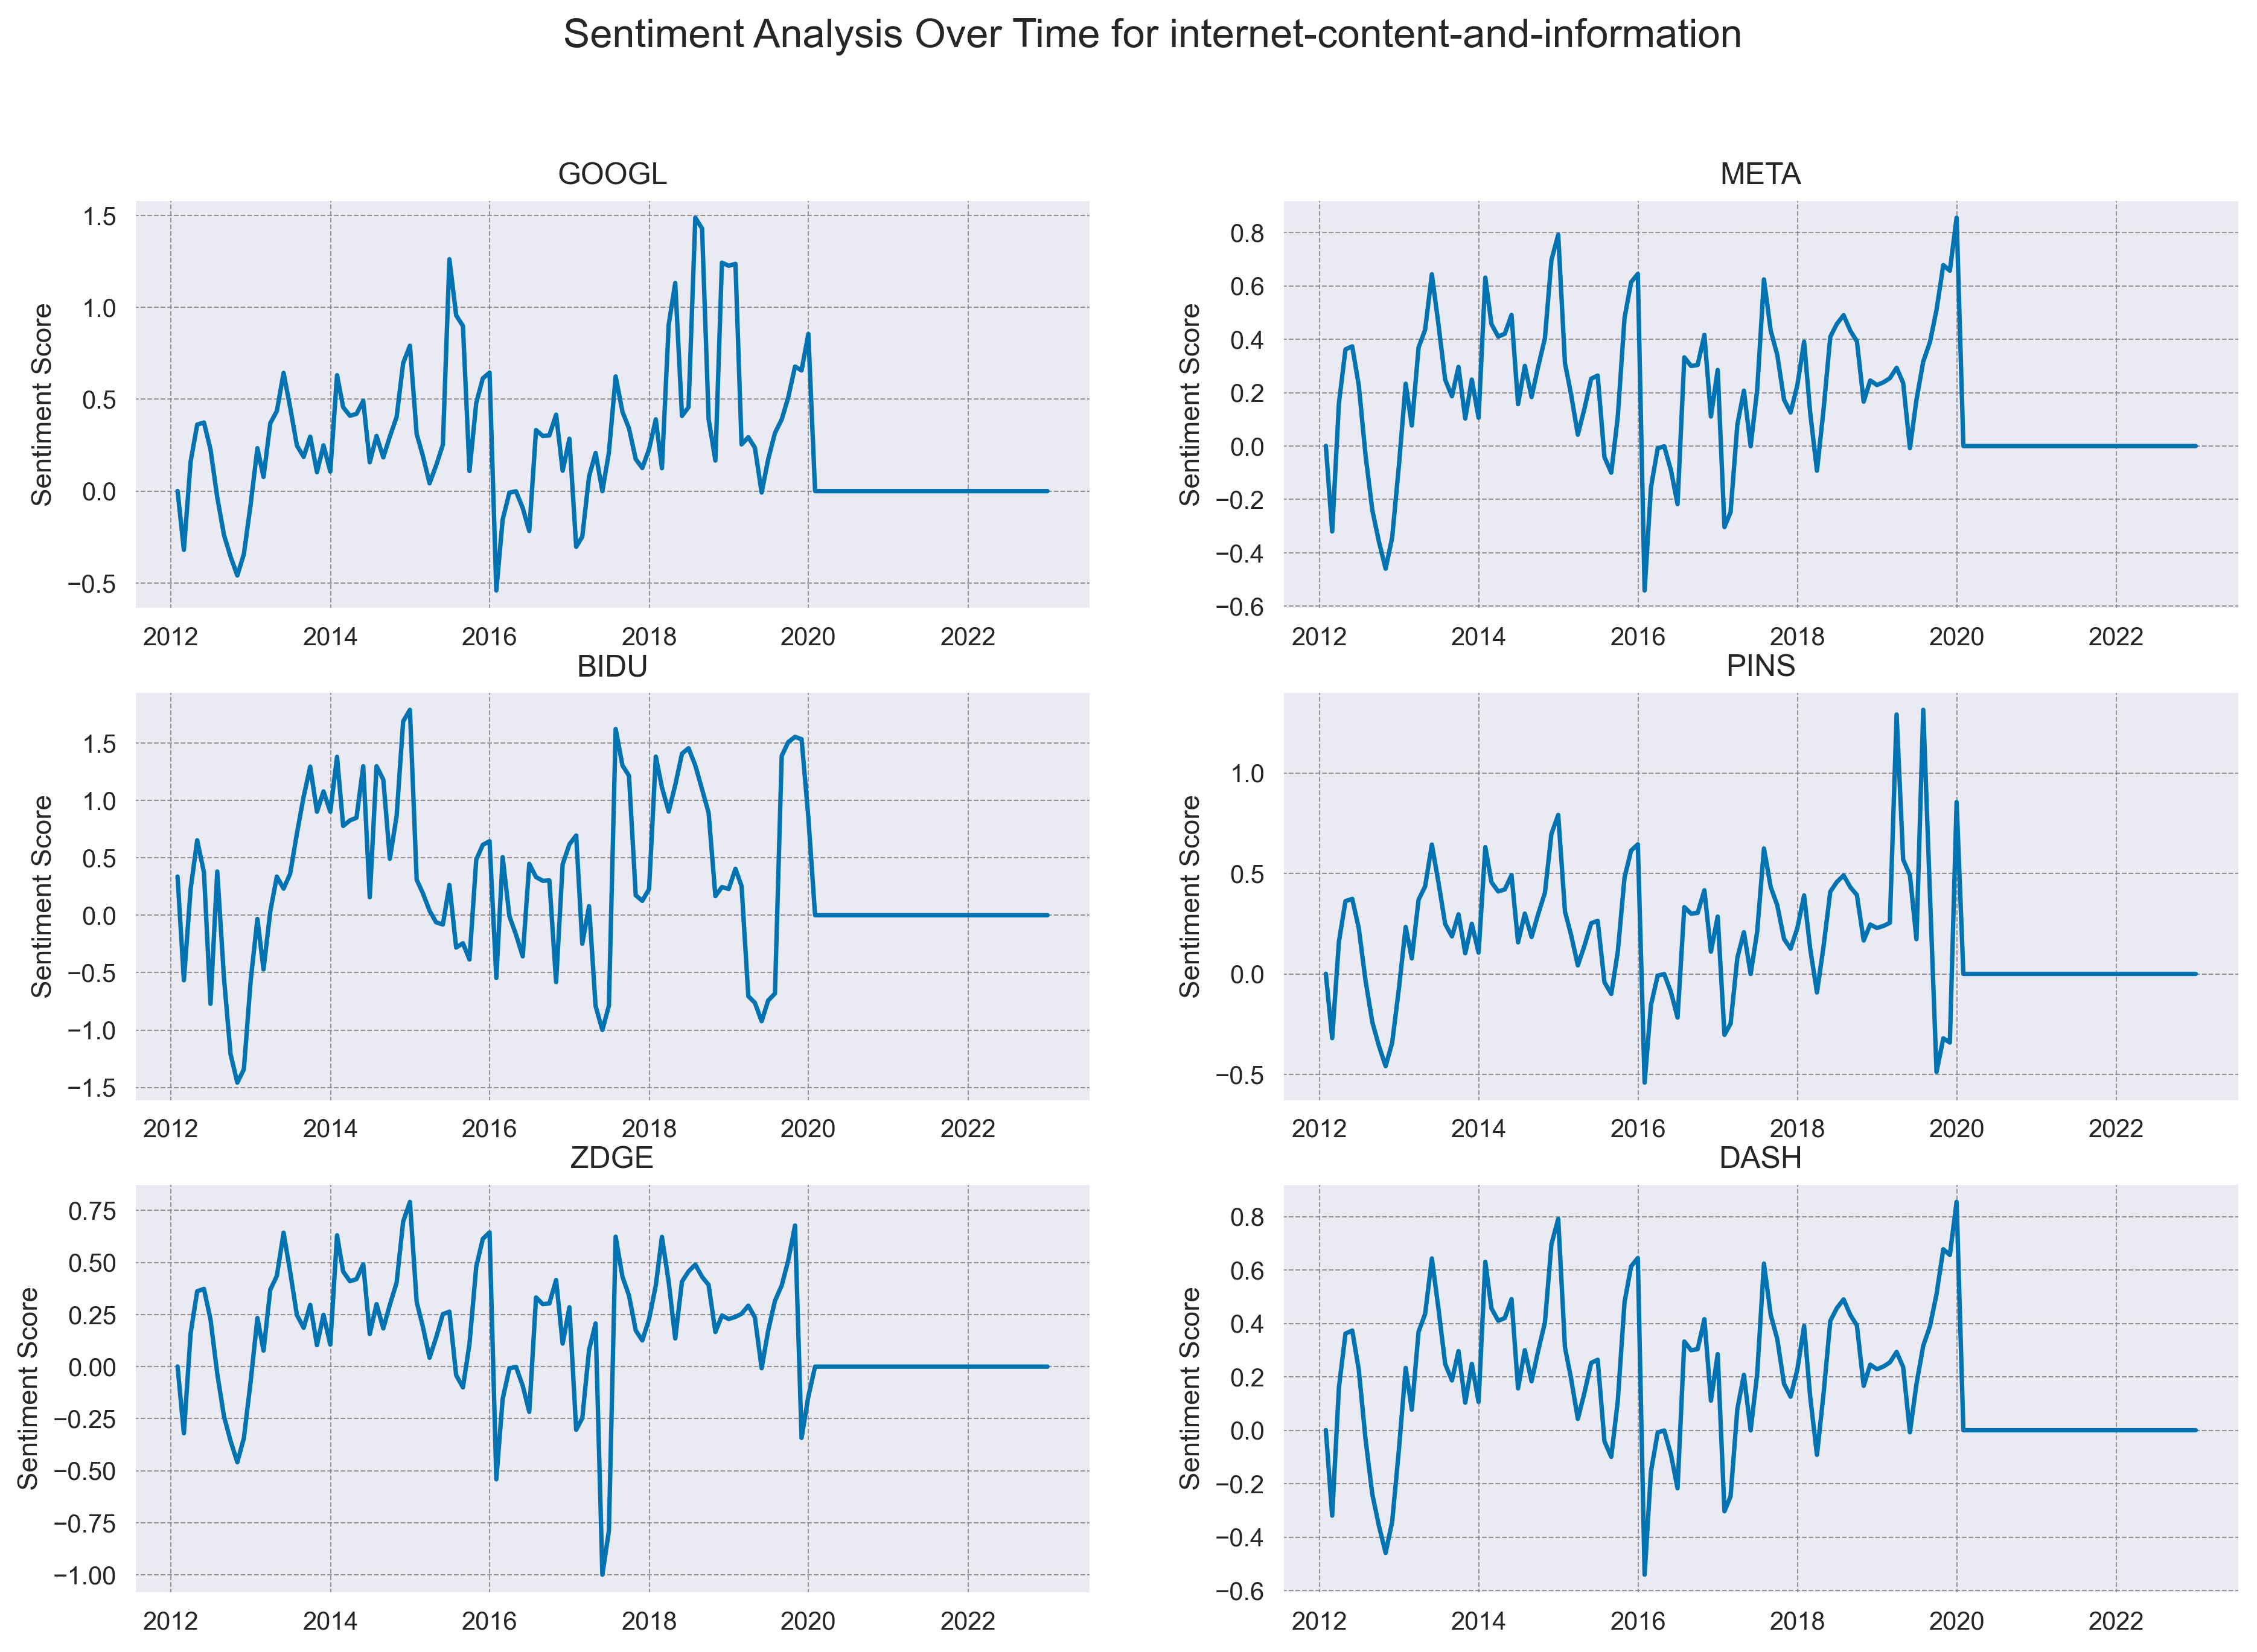

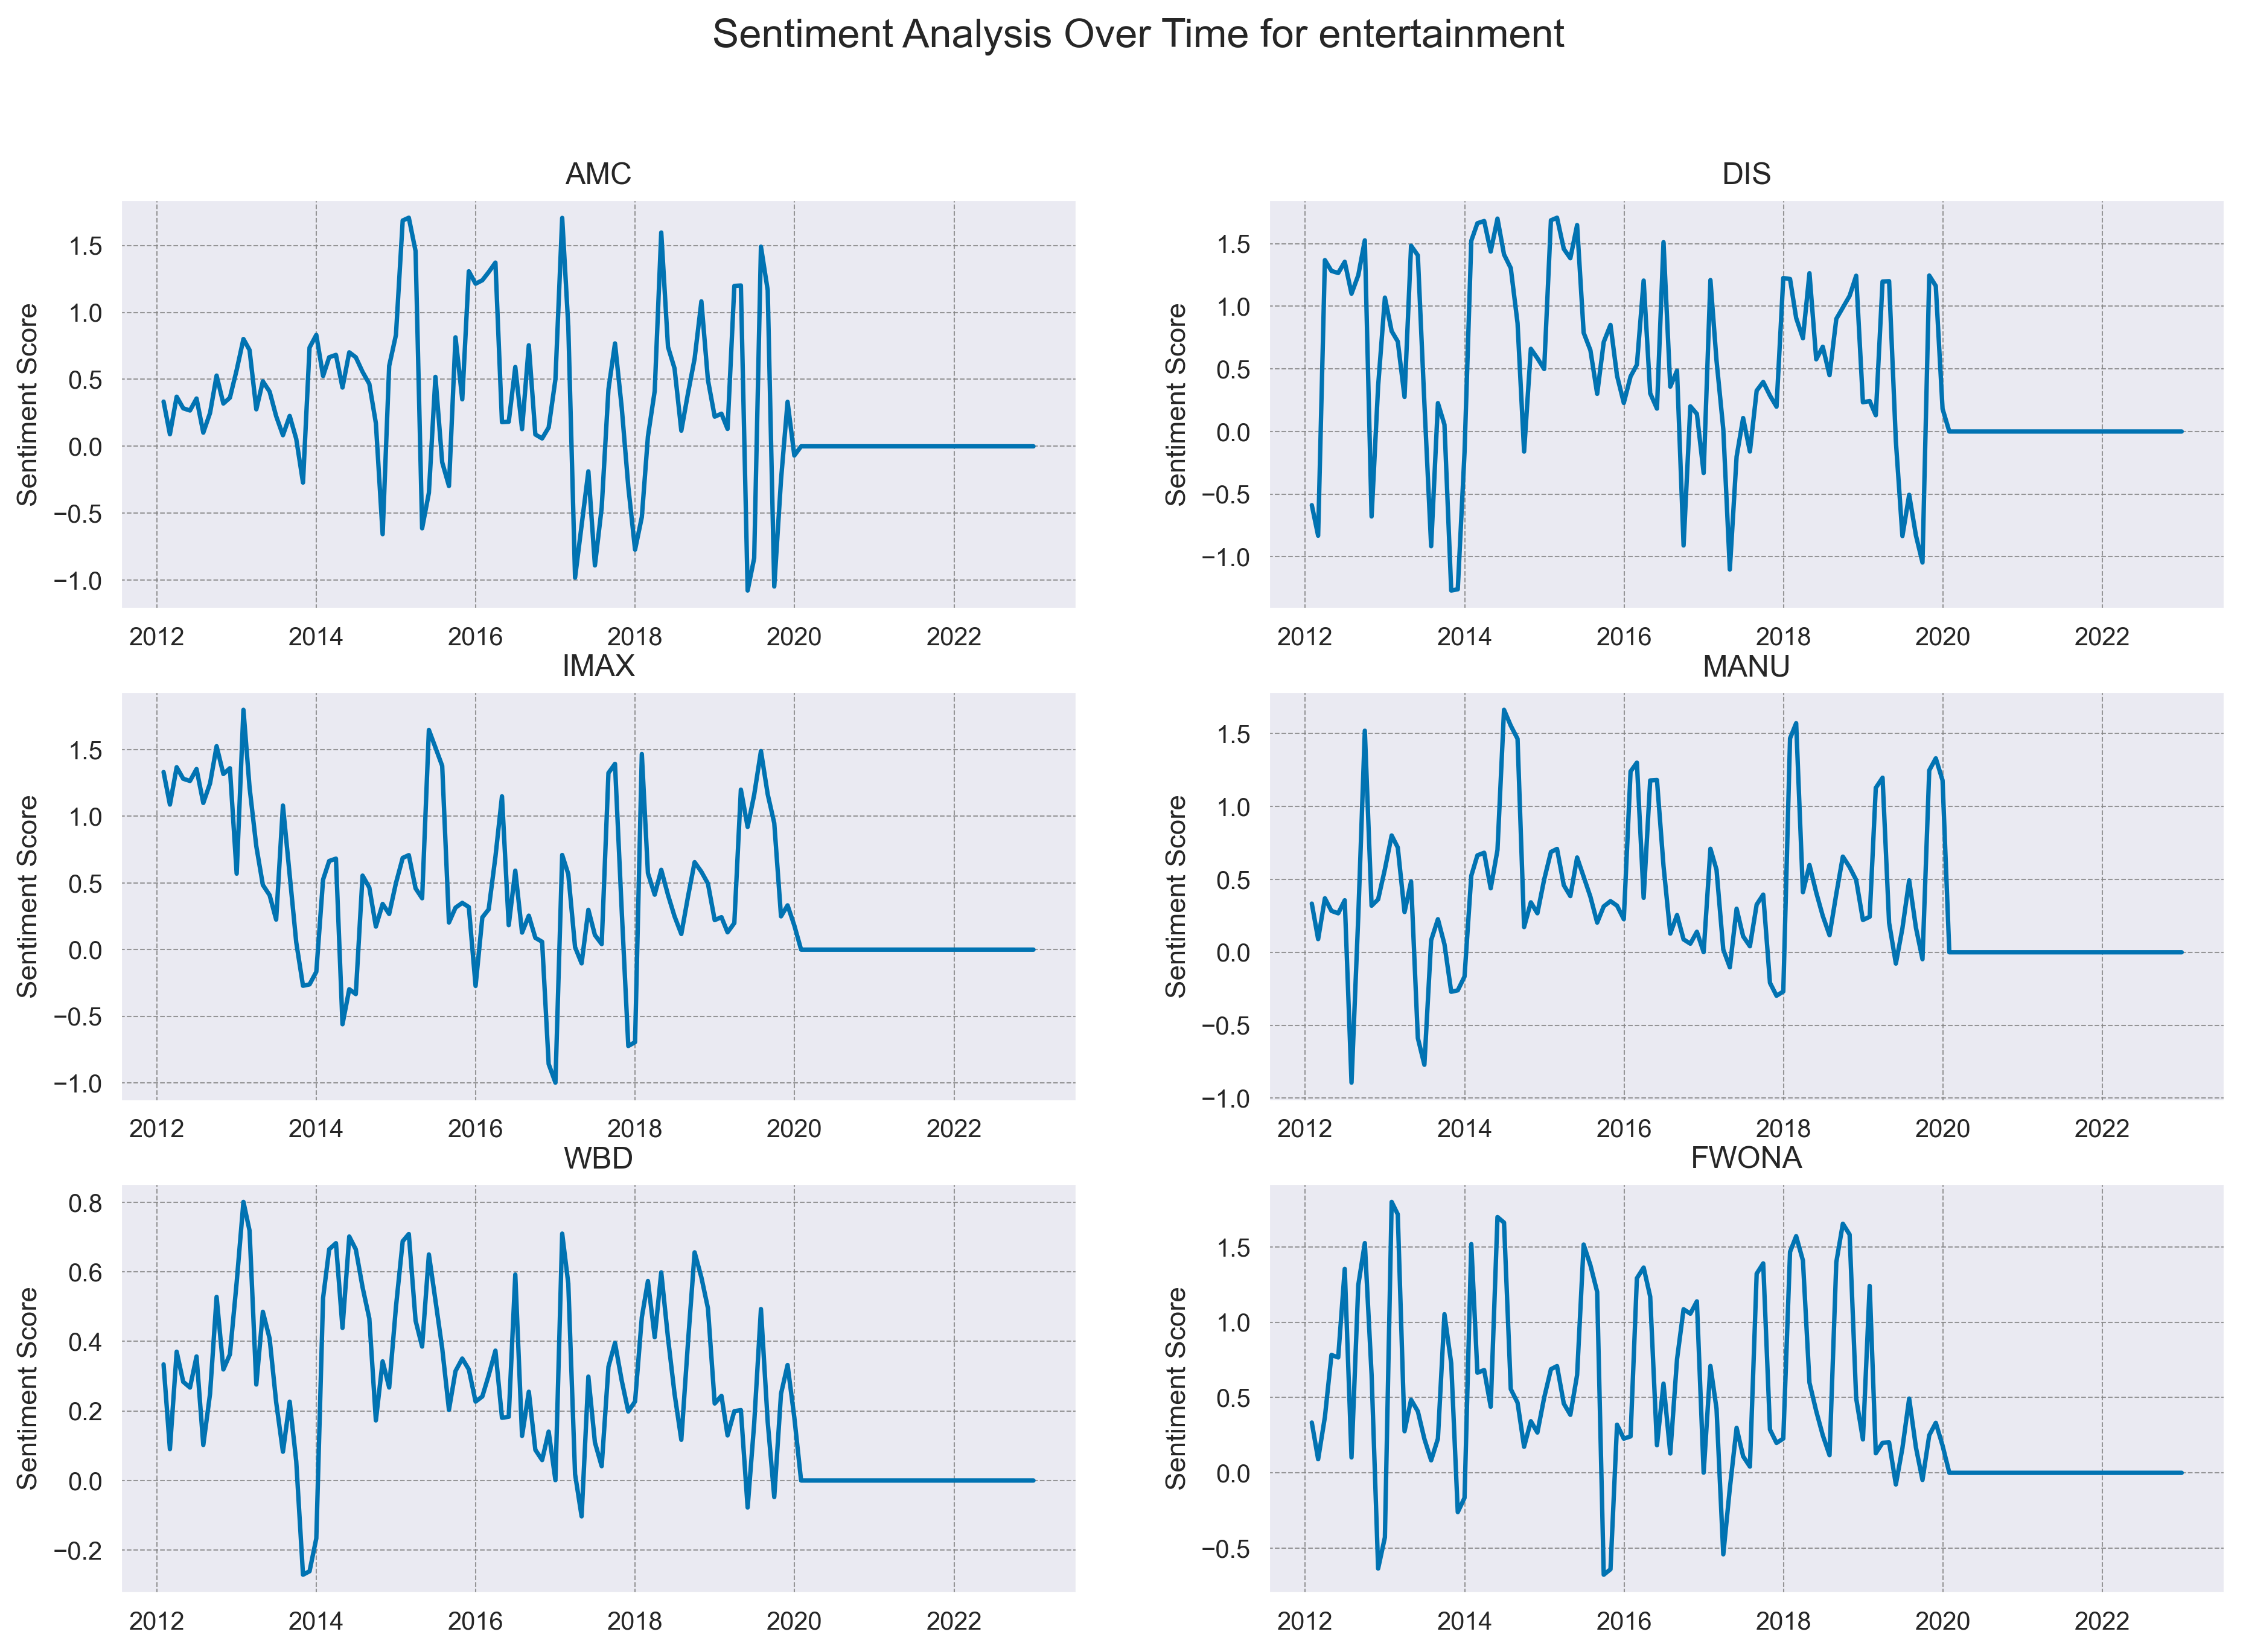

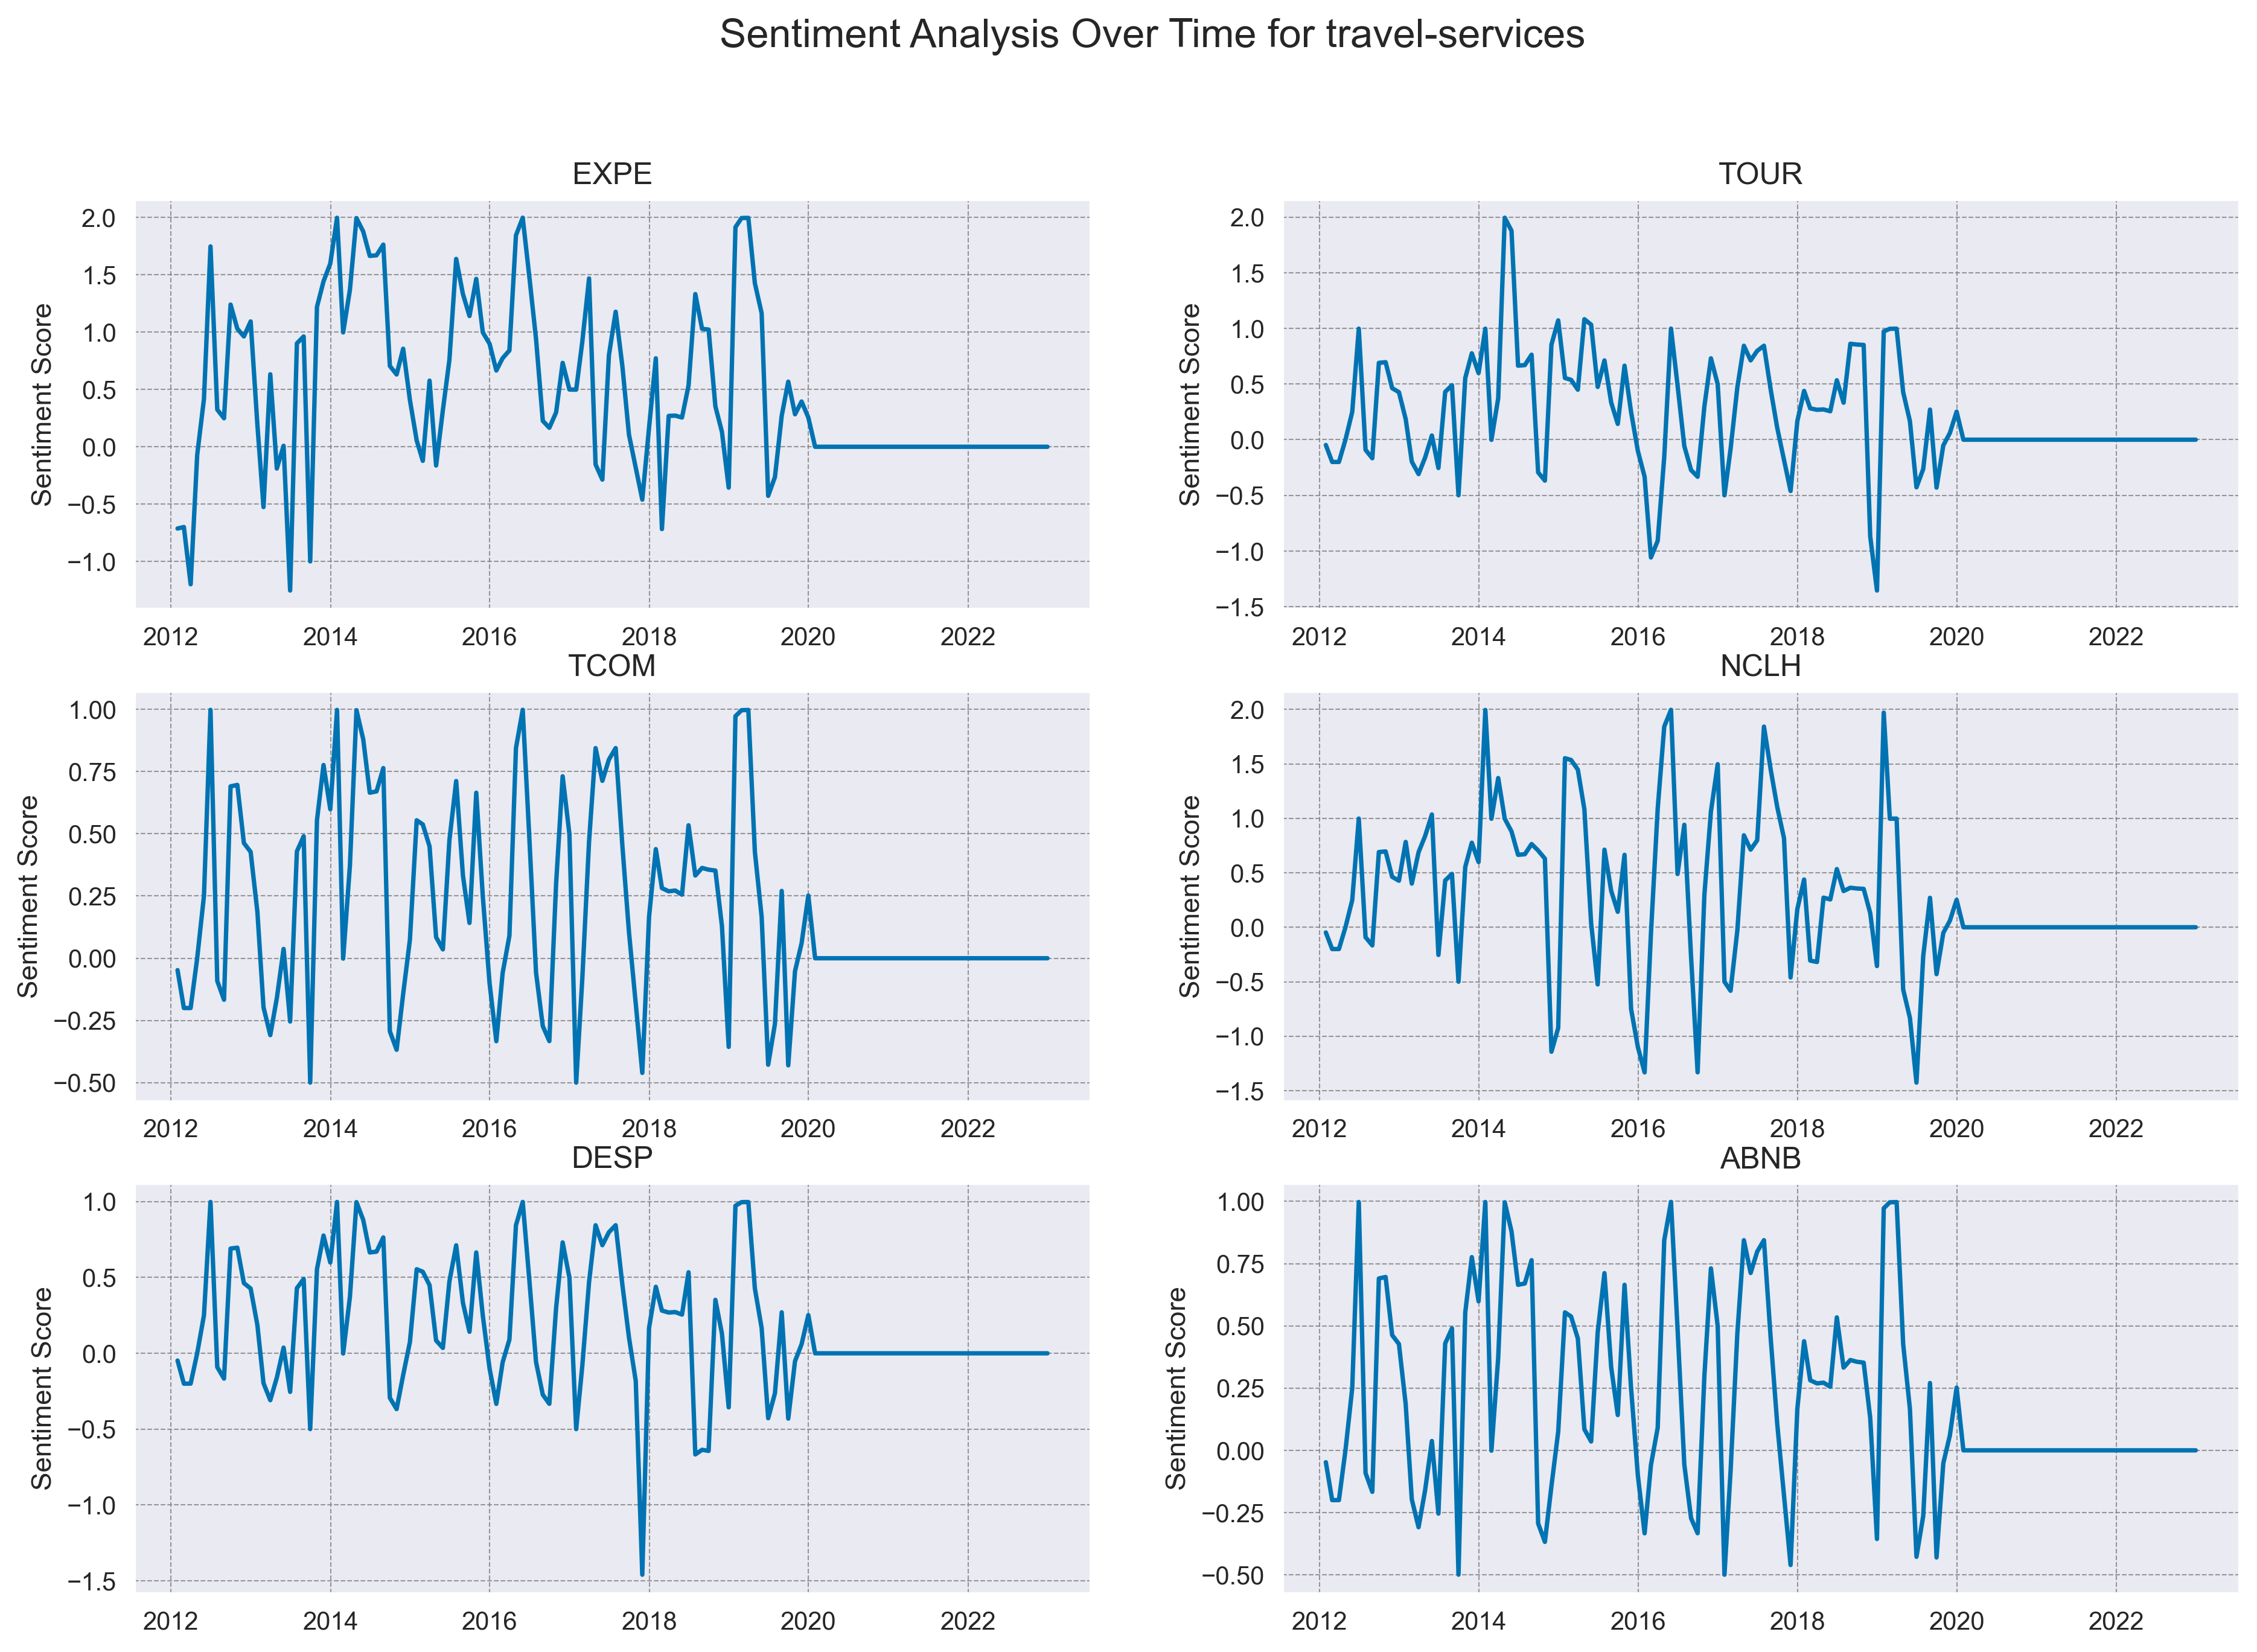

In [20]:
tickers_tech = ['GOOGL', 'META', 'BIDU', 'PINS', 'ZDGE', 'DASH']
tickers_entertainment =  ['AMC', 'DIS', 'IMAX', 'MANU', 'WBD', 'FWONA'] 
tickers_travel = ['EXPE', 'TOUR', 'TCOM', 'NCLH', 'DESP', 'ABNB']
tickers = [tickers_tech, tickers_entertainment, tickers_travel]

for ticker in tickers:
    df_sentiment_selected_companies = df_sentiment[df_sentiment['Company'].isin(ticker)]
    industry = df_sentiment_selected_companies['industry'].iloc[0]
    title = 'Sentiment Analysis Over Time for ' + industry
    sns.set_style('darkgrid')
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), dpi=300)

    for i, ax in enumerate(axs.flatten()):
        if i < len(ticker):
            sns.lineplot(data=df_sentiment_selected_companies[df_sentiment_selected_companies['Company'] == ticker[i]], x='Date', y='sentiment', hue='Company', errorbar=None, palette='colorblind', ax=ax)
            ax.set_title(ticker[i])
            ax.set_xlabel('Date', visible=False)
            ax.set_ylabel('Sentiment Score')
            ax.legend().remove()
            ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.8)
        else:
            ax.remove()
    fig.suptitle(title, fontsize=16)